In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
# Grab and process the raw data.
data_path = ("new_york_crime.csv"
            )
crime_raw = pd.read_csv(data_path, delimiter= ',', header=0)
crime_raw = crime_raw.fillna('0')
crime_raw.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,"1,861",0,0.000,0,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,"2,577",3,0.000,0,0,0,3,24,3,20,1,0.000
2,Akron Village,"2,846",3,0.000,0,0,0,3,16,1,15,0,0.000
3,Albany,"97,956",791,8.000,0,30,227,526,"4,090",705,"3,243",142,0
4,Albion Village,"6,388",23,0.000,0,3,4,16,223,53,165,5,0


In [3]:
crime_raw.City = crime_raw.City.apply(lambda x: x.lower())

crime_raw.describe()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
count,351,351,351,351.000,351,351,351,351,351,351,351,351,351
unique,351,348,82,15.000,1,26,51,69,239,124,232,51,14
top,plattekill town,0,0,0.000,0,0,0,0,0,0,0,0,0
freq,1,3,54,299.000,351,207,142,69,9,24,10,96,164


In [4]:
#crime_raw.Population = crime_raw.Population.apply(lambda x: x.translate(None, string.punctuation))

crime_raw.Population.dtypes

dtype('O')

In [5]:
crime = crime_raw
crime.columns = map(str.lower, crime.columns) #Replace column name with first word of name 
crime.columns = crime.columns.str.split().str[0].str.strip() #crime.head() 
#Select data  
crime = crime[['property','city','population','murder','robbery']] 
crime.dtypes

valid = '1234567890.' #valid characters for a float 
def sanitize(data): 
    return int(''.join(filter(lambda char: char in valid, data)))


crime['population'] = crime['population'].apply(sanitize)
crime['property'] = crime['property'].apply(sanitize)
crime['murder'] = crime['murder'].astype(int)
crime['robbery'] = crime['robbery'].apply(sanitize)
crime.head()

C:\Users\Zack\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\Zack\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Zack\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/in

,property,city,population,murder,robbery
0,12,adams village,1861,0,0
1,24,addison town and village,2577,0,0
2,16,akron village,2846,0,0
3,4090,albany,97956,8,227
4,223,albion village,6388,0,4


In [6]:
mean_pop = crime.population.mean(skipna=True)
print (mean_pop)

39695.4301994302


In [11]:
features = crime
features['robbery'] = np.where(crime.robbery <1, 0, 1)

# Check to make sure it worked.
print(crime.robbery.groupby(features['robbery']).describe())

          count  mean   std   min   25%   50%   75%   max
robbery                                                  
0       142.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
1       209.000 1.000 0.000 1.000 1.000 1.000 1.000 1.000


C:\Users\Zack\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [12]:
features['murder'] = np.where(crime.murder <1, 0, 1)

# Check to make sure it worked.
print(crime.murder.groupby(features['murder']).describe())


         count  mean   std   min   25%   50%   75%   max
murder                                                  
0      302.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
1       49.000 1.000 0.000 1.000 1.000 1.000 1.000 1.000


C:\Users\Zack\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
features['population'] = crime['population']
features['property'] = crime.property

#features['population'] = features.population.round()
#features['population'] = features.population.astype(int)
features.head()

C:\Users\Zack\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Zack\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,property,city,population,murder,robbery
0,12,adams village,1861,0,0
1,24,addison town and village,2577,0,0
2,16,akron village,2846,0,0
3,4090,albany,97956,1,1
4,223,albion village,6388,0,1


In [14]:
features['population_squared'] = crime['population'] * crime['population']
features.head()

C:\Users\Zack\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,property,city,population,murder,robbery,population_squared
0,12,adams village,1861,0,0,3463321
1,24,addison town and village,2577,0,0,6640929
2,16,akron village,2846,0,0,8099716
3,4090,albany,97956,1,1,9595377936
4,223,albion village,6388,0,1,40806544


### Now that the data is cleaned and my features are made I want to take a look at some of the plots to explore my data. First is a scatterplot matrix.

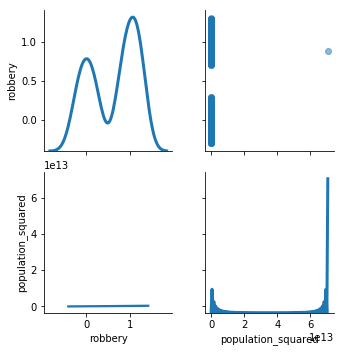

In [15]:
# Make a copy of the data to add jitter to and plot.
df_jittered = features.loc[:, 'robbery':'population_squared'].dropna()
# Making the random noise.
jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(df_jittered.shape)),
    columns=df_jittered.columns
)
# Combine the data and the noise.
df_jittered = df_jittered.add(jitter)

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_jittered.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

### Now let's look at the correlation matrix for the entire dataset. 

                    property  population  murder  robbery  population_squared
property               1.000       0.996   0.191    0.080               0.991
population             0.996       1.000   0.162    0.065               0.998
murder                 0.191       0.162   1.000    0.315               0.133
robbery                0.080       0.065   0.315    1.000               0.044
population_squared     0.991       0.998   0.133    0.044               1.000


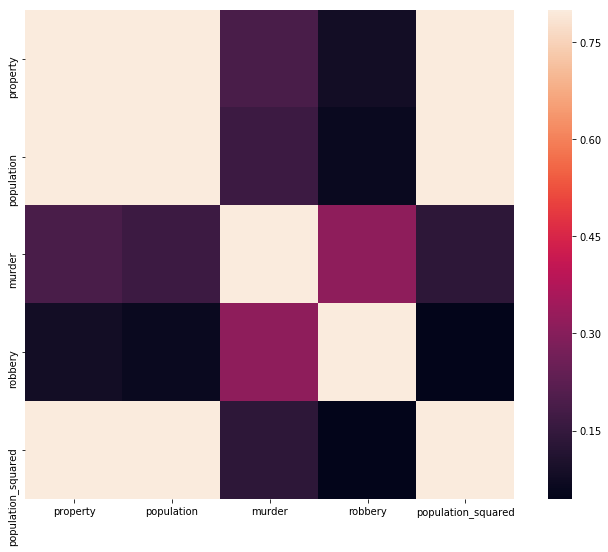

In [16]:
# Make the correlation matrix.
corrmat = features.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()
# Heatmaps are a great way to get a quick visual read on a big correlation matrix.

# Try to match the correlation numbers to the scatterplots above to get a 
# sense of what each magnitude of correlation can look like.


In [17]:


# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = features['property'].values.reshape(-1, 1)
X = features[['murder', 'robbery', 'population']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))



Coefficients: 
 [[6.07366420e+02 1.06307507e+02 1.68728179e-02]]

Intercept: 
 [-32.03081127]

R-squared:
0.9934489903845435


In [20]:
import statsmodels.formula.api as smf
# Write out the model formula.
# Your dependent variable on the right, independent variables on the left
# Use a ~ to represent an '=' from the functional form
linear_formula = 'property ~ population+population_squared+murder+robbery'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=features).fit()

In [21]:
lm.params

Intercept            -107.226
population              0.035
population_squared     -0.000
murder                 15.397
robbery               -98.486
dtype: float64

In [22]:
lm.pvalues

Intercept            0.008
population           0.000
population_squared   0.000
murder               0.860
robbery              0.081
dtype: float64

In [23]:
lm.rsquared

0.996123334982826

### Robbery and Murder have p values greater than .05, suggesting these could be dropped without adversely effecting the R squared value. Let's try.

In [24]:
# Write out the model formula.
# Your dependent variable on the right, independent variables on the left
# Use a ~ to represent an '=' from the functional form
linear_formula = 'property ~ population+population_squared'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=features).fit()

In [25]:
lm.params

Intercept            -155.144
population              0.034
population_squared     -0.000
dtype: float64

In [26]:
lm.pvalues

Intercept            0.000
population           0.000
population_squared   0.000
dtype: float64

In [27]:
lm.rsquared

0.9960889227730451

In [28]:
lm.conf_int()

,0,1
Intercept,-213.637,-96.650
population,0.032,0.036
population_squared,-0.000,-0.000


In [29]:
# Use wls_prediction_std to build confidence intervals
prstd, iv_l, iv_u = wls_prediction_std(lm)

plt.figure()
plt.plot(iv_u[0:15], 'o', color='r')
plt.plot(iv_l[0:15], 'o', color='r')
plt.plot(lm.fittedvalues[0:15], 'o', color='b')
plt.title('blue: predicted, red: 95% CI')
plt.show()

NameError: name 'wls_prediction_std' is not defined